### Basic Image Processing <br>

Translation,Rotation,Resizing,Flipping,Cropping,Image arithmetic, Bitwise operations, Masking, Splitting and merging channels.

**Translation** shifting of an image along the x and y axis.<br>
Applications: shift image up, down, left or right. <br>

cv2.warpAffline( image, M, (image.shape[1], image.shape[0] ) ) <br>

for examples, [[1, 0, shiftX], [0, 1, shiftY]] <br>
[1,0,tx], where tx is number of pixles; shift image left or right; if -ve left and if +ve right shift.<br>
second row, [0,1,ty ] where ty is the number of pixles shift the image up or down. if -ve, ty shift the image up and +ve values shift down. <br>


In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

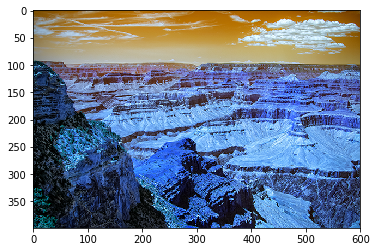

In [2]:
file ="/mnt/c/cnn_dl/sample.png"
image = cv2.imread(file)

plt.imshow( image )




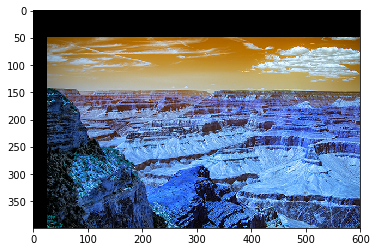

In [3]:
M = np.float32([[1, 0, 25], [0, 1, 50]]) # 25 pixels to right and 50 pixels to down
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

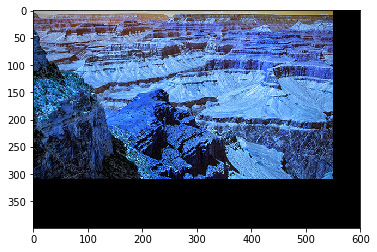

In [4]:
# shift the image 50 pixels to the left and 90 pixels up
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

In [5]:
def translate(image, x, y):
    # define the translation matrix and perform the translation
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
 
    # return the translated image
    return shifted

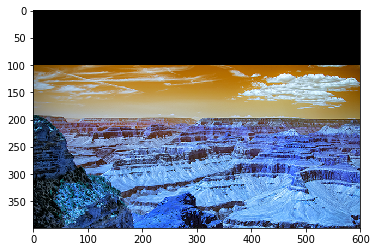

In [6]:
shifted = imutils.translate(image, 0, 100)
plt.imshow(shifted)

**Rotation** rotation by an angle. <br>
Applications: how many degrees are rotating the images.<br>
<br>
cv2.getRotationMatrix2D( (cX,cY), degree, scale )


In [7]:
def rotate(image, angle, center=None, scale=1.0):
    # grab the dimensions of the image
    (h, w) = image.shape[:2]
 
    # if the center is None, initialize it as the center of
    # the image
    if center is None:
        center = (w / 2, h / 2)
 
    # perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
 
    # return the rotated image
    return rotated

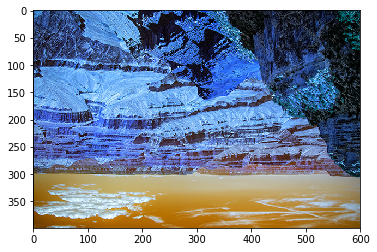

In [8]:
rotated = imutils.rotate(image, 180)
plt.imshow(rotated)

**Resizing** process of increasing or decreasing the size of an image in terms of width and height. <br>
Applications: the ratio of the width of the image to the height of an image. Ignoring the aspect ratio can lead to resized images that look compressed and distorted. <br>
<br>
aspect_ration = width/height <br>

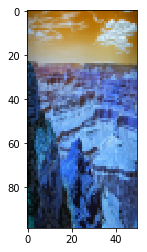

In [9]:
r = 150.0 / image.shape[1]
dim = ( 50, int( image.shape[0] * r ))

resized = cv2.resize( image, dim, interpolation=cv2.INTER_AREA )

plt.imshow(resized)

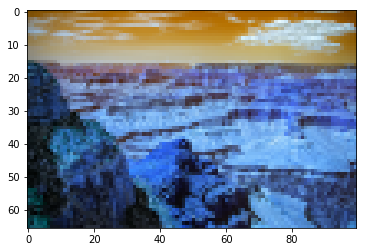

In [10]:
resized = imutils.resize( image, width=100 )
plt.imshow( resized )

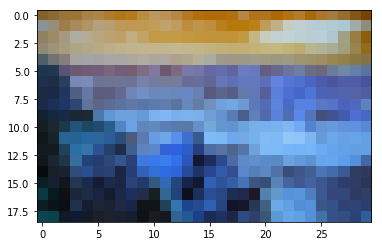

In [11]:
resized = imutils.resize( image, width= 30 , height=50)
plt.imshow(resized)

In [12]:
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
 
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
 
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
 
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))
 
    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)
 
    # return the resized image
    return resized

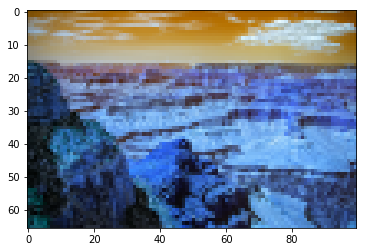

In [13]:
resized = resize( image, 100, 200 )
plt.imshow( resized )

Interpolations method: Goal of this is to examine neighborhoods of pixles and use these optically increase or decrease the size of image; <br>
cv2.INTER_NEAREST : use the neartest neighborhood. <br>
cv2.INTER_LINEAR  : performs bilinear interpolcation ( y = mx + b ) <br>
cv2.INTER_AREA  <br>
cv2.INTER_CUBIC and cv2.INTER_LANCZOS4

**Flipping** flip an image across its x or y axis;<br>
Usage: when the test image files are less and create files by flipping;

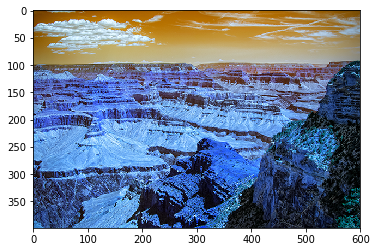

In [14]:
# flip the image horizontally
flipped = cv2.flip( image, 1)
plt.imshow(flipped)

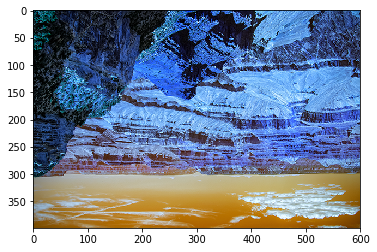

In [15]:
#flip vertical
flipped = cv2.flip( image, 0 )
plt.imshow(flipped)

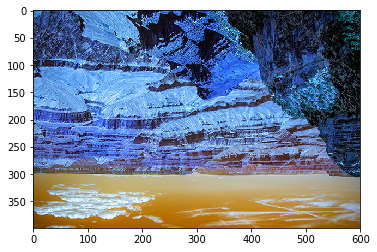

In [16]:
# flip along both axes;
flipped = cv2.flip(image, -1 )
plt.imshow(flipped)

**Cropping** is the act of selecting and extracting the Region of Interest ( ROI ) <br>
Usage: face detection, recognize the dogs in the group image.

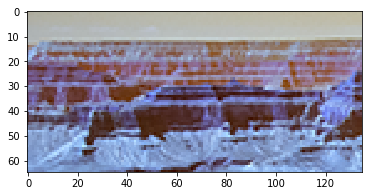

In [17]:
parse = image[ 85:150, 85:220 ]
plt.imshow( parse )

**Image Arithmetic **: cv2  and numpy arithmetic.

In [19]:
#In CV2, values are clipped;

print('max of 255:{}'.format(str(cv2.add(np.uint8([200]), np.uint8([100])))))

print("min of 0: {}".format(str(cv2.subtract(np.uint8([50]), np.uint8([100])))))

max of 255:[[255]]
min of 0: [[0]]


In [22]:
#In numpy, the value will be modulo ( wrap around) instead clipped to the [0,255] range;
# 8 -bit has 0 to 255 bits;

print("wrap around: {}".format(str(np.uint8([200]) + np.uint8([100]))))
print("wrap around: {}".format(str(np.uint8([50]) - np.uint8([100]))))

wrap around: [44]
wrap around: [206]


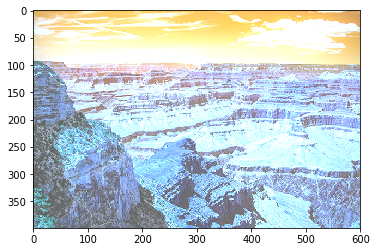

In [24]:
# Increase the intensity by 100 using numpy array;

M = np.ones( image.shape, dtype = "uint8" ) * 100
added = cv2.add(image, M )
plt.imshow( added)

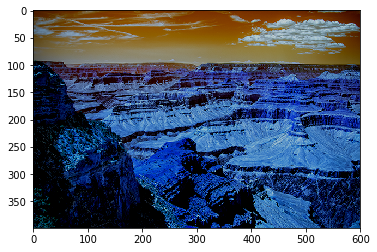

In [29]:
#Make darker by subtract by 50;

M = np.ones(image.shape, dtype='uint8') * 50
substract = cv2.subtract(image, M)
plt.imshow( substract)

**Bitwise** operations:

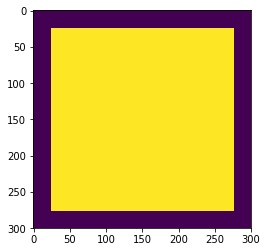

In [30]:
rectangle = np.zeros( (300, 300), dtype='uint8')
cv2.rectangle( rectangle, (25,25), (275,275), 277, -1 )
plt.imshow(rectangle)

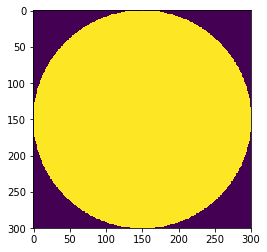

In [31]:
#draw circle
circle = np.zeros( (300,300), dtype='uint8' )
cv2.circle( circle, (150,150), 150, 255, -1 )
plt.imshow(circle)

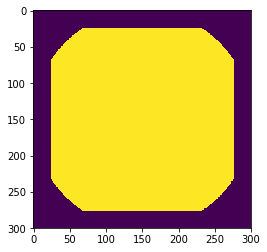

In [32]:
# True: when both rectangle and circle have a value that is 'ON';
# AND function: if both pixels are > 0; pixles turned 'ON';

bitwiseAnd = cv2.bitwise_and( rectangle, circle )
plt.imshow(bitwiseAnd)

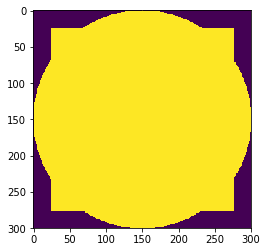

In [36]:
# Either pixels are > 0; then 255; else 0
bitwiseOr = cv2.bitwise_or( rectangle, circle )
plt.imshow(bitwiseOr)

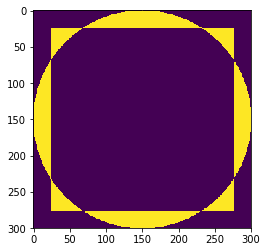

In [38]:
# Both values are greater than zero;

bitwiseXor = cv2.bitwise_xor( rectangle, circle )
plt.imshow(bitwiseXor)

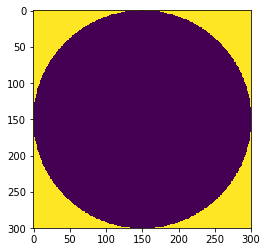

In [39]:
# Inverts the values
bitwiseNot = cv2.bitwise_not(circle)
plt.imshow(bitwiseNot)

**Masking** a combinations of both bitwise operations and masks to construct ROIs that are non-rectangular. This allows to extract regions from images that are arbitrary shape. <br>
Mask allows to focus only on the portions of the image' <br>
For example, search some mark in the faces; Identify the flower/plant<br>


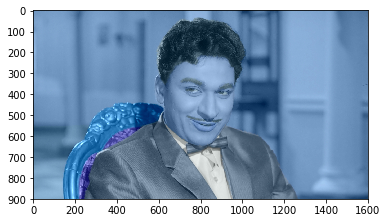

In [42]:
file ="/mnt/c/cnn_dl/drraj.jpg"
image = cv2.imread(file)

plt.imshow( image )

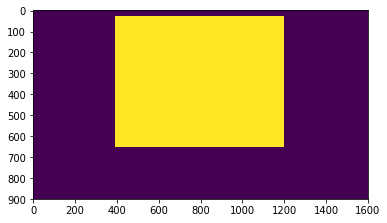

In [82]:
mask = np.zeros( image.shape[:2], dtype='uint8' )
cv2.rectangle( mask, ( 1200,30), (390, 650), 255, -1 )
plt.imshow(mask)

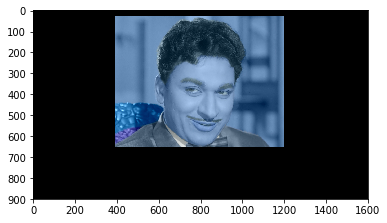

In [83]:
masked = cv2.bitwise_and( image, image, mask=mask )
plt.imshow(masked)

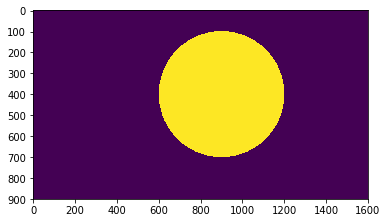

In [96]:
mask = np.zeros( image.shape[:2], dtype='uint8')
cv2.circle( mask, ( 900, 400), 300, 255, -1 )

plt.imshow(mask)

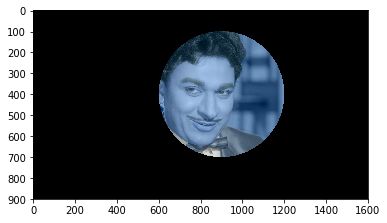

In [97]:
masked = cv2.bitwise_and( image, image, mask=mask )
plt.imshow( masked )

**Splitting and Merging channels**<br>
An image represented by R G B and how to access each individual channel? <br>
Using numpy arrays.<br>
cv2.split() <br>
cv2.merge() <br>


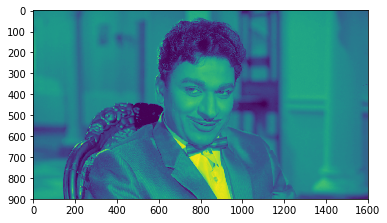

In [99]:
(B,G,R) = cv2.split(image)

#show each channels
plt.imshow(B)

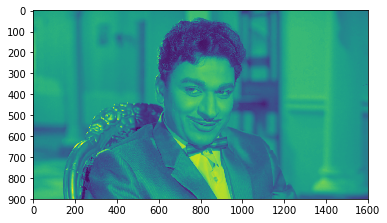

In [100]:
plt.imshow(G)

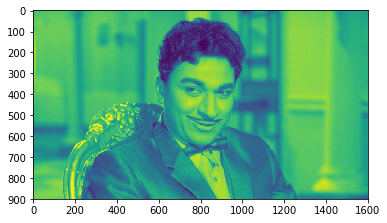

In [101]:
plt.imshow(R)

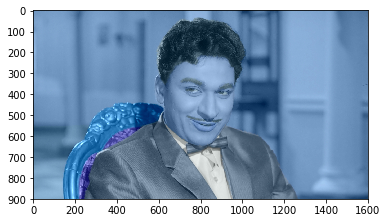

In [103]:
merged = cv2.merge( [ B,G,R])
plt.imshow( merged)

cv2.destroyAllWindows()

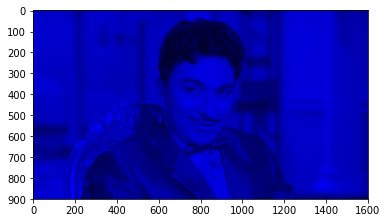

In [104]:

zeros = np.zeros( image.shape[:2], dtype='uint8')

plt.imshow( cv2.merge( [zeros, zeros, R]))

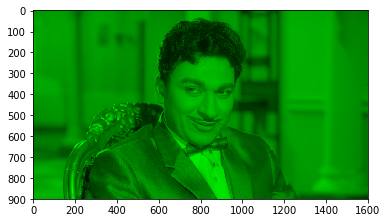

In [105]:
plt.imshow( cv2.merge([zeros, G, zeros ]))

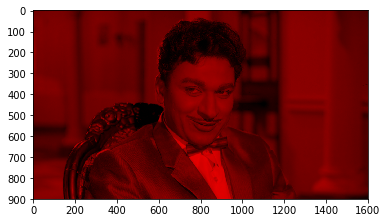

In [106]:
plt.imshow( cv2.merge([B, zeros, zeros ]))